# **Assignment-2**

>


| **Name:**    | Yug Patel           |
|--------------|---------------------|
| **Roll Number:** | CS23MTECH4019     |
>

###  Importing Required Modules

In [2]:
import cv2
import torch
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

### **(1) Convolution Function**
- The convolution Function takes image, kernal, stride, padding and activation function as a input and convolve over the image with the specified kernal size and taking movements accoridng to the stride step.
- The convolution Function operates on the volume level i.e. considers the kernel depth same as that of the image/ input volume depth. Its just considers one kernal to convolve over producing a single channel/ depth output.



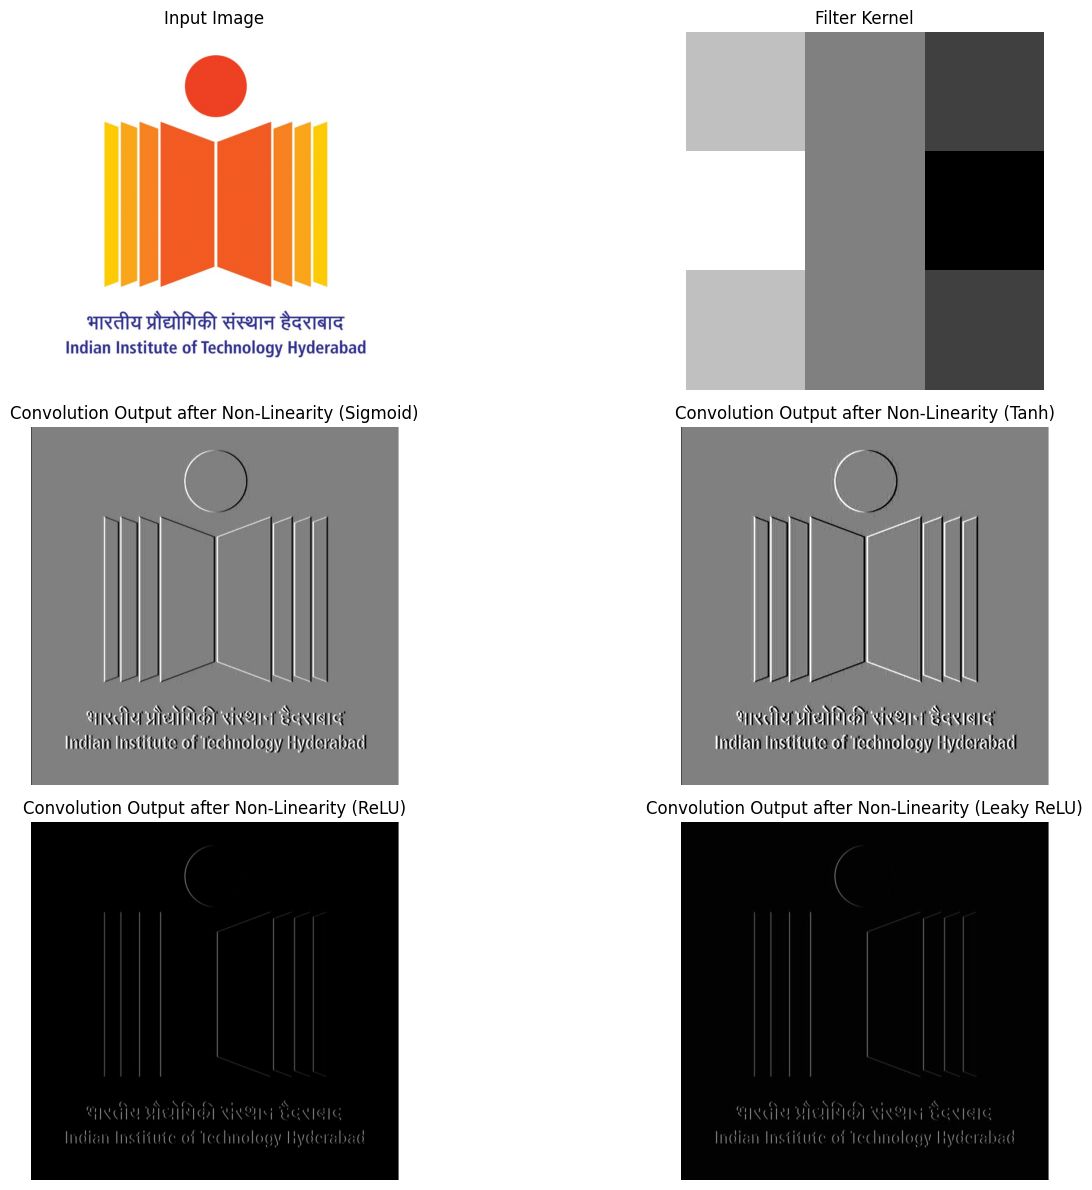

In [3]:
# Load a image
image_path = 'iithLogo.png'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Define a filter kernel with the same number of channels as the input image

# Define a 3D Sobel kernel along the x-axis
kernel = np.array([[[1, 0, -1],
                    [2, 0, -2],
                    [1, 0, -1]],

                  [[1, 0, -1],
                    [2, 0, -2],
                    [1, 0, -1]],

                  [[1, 0, -1],
                    [2, 0, -2],
                    [1, 0, -1]]], dtype=np.float32)

# Point Detection Kernel
# kernel = np.array([
#     [[-1, -1, -1, -1, -1],
#      [-1, -1, -1, -1, -1],
#      [-1, -1, 24, -1, -1],
#      [-1, -1, -1, -1, -1],
#      [-1, -1, -1, -1, -1]],

#     [[-1, -1, -1, -1, -1],
#      [-1, -1, -1, -1, -1],
#      [-1, -1, 24, -1, -1],
#      [-1, -1, -1, -1, -1],
#      [-1, -1, -1, -1, -1]],

#     [[-1, -1, -1, -1, -1],
#      [-1, -1, -1, -1, -1],
#      [-1, -1, 24, -1, -1],
#      [-1, -1, -1, -1, -1],
#      [-1, -1, -1, -1, -1]]
# ])

# Define a 3D Sobel kernel along the y-axis using NumPy
# kernel = np.array([[[1, 2, 1],
#                     [0, 0, 0],
#                     [-1, -2, -1]],

#                   [[1, 2, 1],
#                     [0, 0, 0],
#                     [-1, -2, -1]],

#                   [[1, 2, 1],
#                     [0, 0, 0],
#                     [-1, -2, -1]]], dtype=np.float32)

# kernel = np.array([[[1, -1, 1],
#                     [-1, 1, -1],
#                     [1, -1, 1]],

#                     [[-1, 1, -1],
#                       [0, -1, -1],
#                       [0, 0, 0]],

#                     [[-1, -1, 1],
#                     [0, -1, -1],
#                     [1, -1, -1]]])


# Set stride and padding
kernel = np.transpose(kernel, (1, 2, 0))
stride = 1
padding= 1

# Define activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(0, x)

def leaky_relu(x, alpha=0.01):
    return np.where(x > 0, x, alpha * x)

def normalize_image(image):
    # Normalize pixel values to the range [0, 1]
    normalized_image = image.astype(float) / 255.0
    return normalized_image

def min_max_normalize(image):
    # Min-Max normalization
    min_val = image.min()
    max_val = image.max()
    normalized_image = (image - min_val) / (max_val - min_val)
    return normalized_image

def convolution(image, kernel, stride, padding, activation_function):

    # Get input dimensions
    in_height, in_width, in_channels = image.shape
    kernel_height, kernel_width, kernel_channels = kernel.shape

    # Apply padding to the input image
    padded_image = np.pad(image, ((padding, padding), (padding, padding), (0, 0)), mode='constant')

    # Calculate output dimensions
    out_height = ((in_height + 2 * padding - kernel_height) // stride) + 1
    out_width = ((in_width + 2 * padding - kernel_width) // stride) + 1

    # Initialize the output activation map
    output_activation = np.zeros((out_height, out_width))

    # Convolution operation
    for i in range(0, out_height):
        for j in range(0, out_width):
            # Extract the region of interest from the padded image
            receptive_field = padded_image[i * stride:i * stride + kernel_height, j * stride:j * stride + kernel_width, :]

            # Element-wise multiplication of the kernel and the Receptive Field
            conv_result = np.sum(np.multiply(receptive_field, kernel))

            # Apply the non-linear activation function
            output_activation[i, j] = activation_function(conv_result)

    return output_activation

plt.figure(figsize=(16, 12))

# Normalize the input image
normalized_image = normalize_image(image)

# Display real-world input imagePutting-it all together
plt.subplot(3, 2, 1)
plt.imshow(normalized_image)
plt.title("Input Image")
plt.axis('off')

# Display filter kernel
plt.subplot(3, 2, 2)
plt.imshow(kernel[:, :, 0], cmap='gray')
plt.title("Filter Kernel")
plt.axis('off')

# Display output activation map for sigmoid activation function
output_activation_sigmoid = convolution(normalized_image, kernel, stride, padding, sigmoid)
plt.subplot(3, 2, 3)
plt.imshow(output_activation_sigmoid, cmap='gray')
plt.title("Convolution Output after Non-Linearity (Sigmoid)")
plt.axis('off')

# Display output activation map for tanh activation function
output_activation_tanh = convolution(normalized_image, kernel, stride, padding, tanh)
plt.subplot(3, 2, 4)
plt.imshow(output_activation_tanh, cmap='gray')
plt.title("Convolution Output after Non-Linearity (Tanh)")
plt.axis('off')

# Display output activation map for relu activation function
output_activation_relu = convolution(normalized_image, kernel, stride, padding, relu)
plt.subplot(3, 2, 5)
plt.imshow(output_activation_relu, cmap='gray')
plt.title("Convolution Output after Non-Linearity (ReLU)")
plt.axis('off')

# Display output activation map for leaky_relu activation function
output_activation_leaky_relu = convolution(normalized_image, kernel, stride, padding, leaky_relu)
plt.subplot(3, 2, 6)
plt.imshow(output_activation_leaky_relu, cmap='gray')
plt.title("Convolution Output after Non-Linearity (Leaky ReLU)")
plt.axis('off')

plt.tight_layout()
plt.show()

### **(2) Pooling Function**
- The Pooling Function takes type of pooling (i.e. max or average), input volume, pool size or receptive feild and stride as input and produces desired output. It doesnot disturb the depth of the volume but squeezes its width and height
-It provides following advantages:

1. Dimensionality Reduction
2. Computationally Efficient
3. Translation Invariance
4. Increased Receptive Field
5. Reduced Overfitting
6. Feature Generalization
7. Memory Efficiency
8. Improved Training Speed


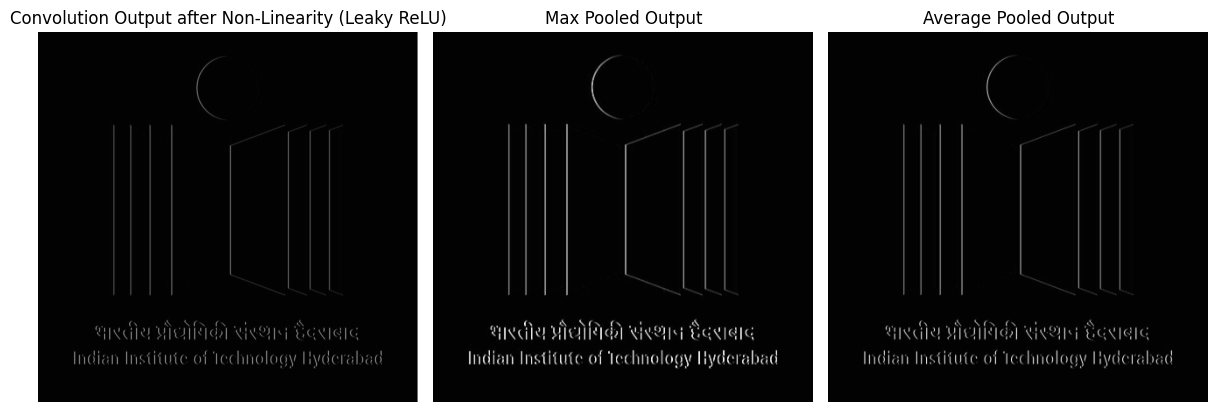

In [4]:
pool_size = 2
pool_stride = 2

def pooling(activation_map, pool_size, stride,pooling_type="max"):
    # Get input dimensions
    input_height, input_width = activation_map.shape

    # Calculate output dimensions
    output_height = (input_height - pool_size) // stride + 1
    output_width = (input_width - pool_size) // stride + 1

    # Initialize the output pooled activation map
    pooled_activation = np.zeros((output_height, output_width))

    # Pooling operation
    for i in range(0, output_height):
        for j in range(0, output_width):
            # Extract the region of interest from the activation map
            receptive_field = activation_map[i * stride:i * stride + pool_size, j * stride:j * stride + pool_size]

            if(pooling_type == "max"):
              # Apply max pooling
              pooled_activation[i, j] = np.max(receptive_field)
            elif(pooling_type == "average"):
              # Apply average poolingFor the last question in assignment 2, you are allowed to use the backward() function in PyTorch, and can inherit from nn.Module to implement the RNN.
              pooled_activation[i, j] = np.mean(receptive_field)

    return pooled_activation

max_pooled_output = pooling(output_activation_leaky_relu, pool_size, pool_stride,"max")

average_pooled_output = pooling(output_activation_leaky_relu, pool_size, pool_stride,"average")

plt.figure(figsize=(12, 6))

# Display the input activation map
plt.subplot(1, 3, 1)
plt.imshow(output_activation_leaky_relu, cmap='gray')
plt.title("Convolution Output after Non-Linearity (Leaky ReLU)")
plt.axis("off")

# Display the max pooled output
plt.subplot(1, 3, 2)
plt.imshow(max_pooled_output, cmap='gray')
plt.title("Max Pooled Output")
plt.axis("off")

# Display the average pooled output
plt.subplot(1, 3, 3)
plt.imshow(average_pooled_output, cmap='gray')
plt.title("Average Pooled Output")
plt.axis("off")

plt.tight_layout()
plt.show()

### **(3) Convolution Layer Function**
- The Convolution layer function takes an input volume, number of filters, kernel dimensions, stride, padding, and activation function as parameters. It convolves the input volume with each kernel using the specified stride, applying padding if required. The function generates an output activation volume by incorporating the specified non-linear activation function.

- Visualizations include the input image/activation maps, filter kernels, and the resulting output activation maps. The implementation is validated by ensuring the output conforms to the expected size (W × H × C)

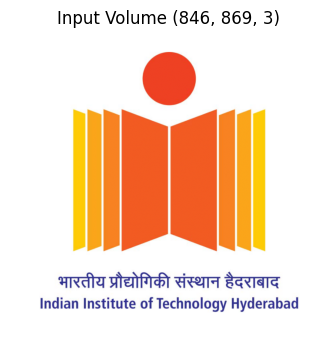

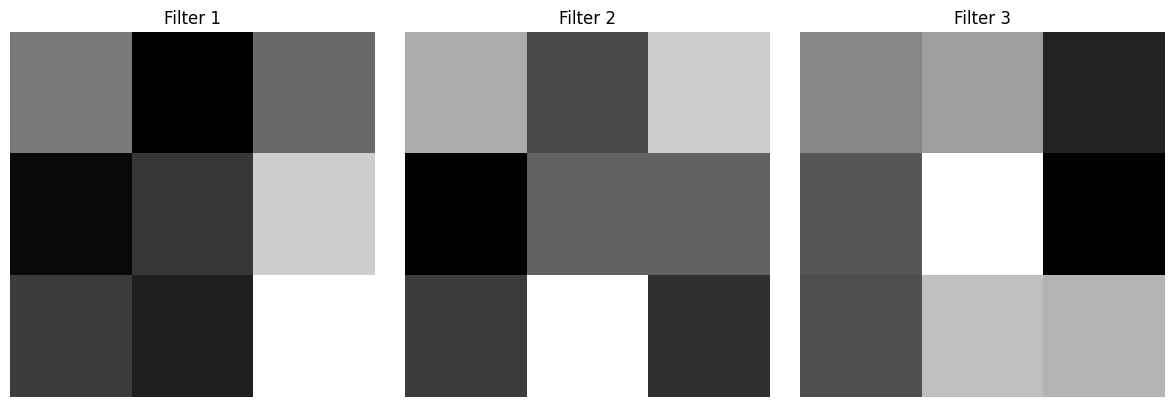

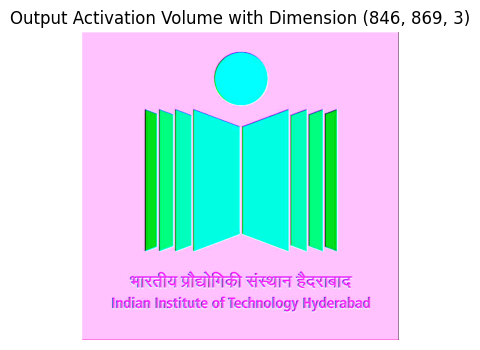

In [5]:
# Define convolution parameters
num_filters = 3
kernel_size = 3
stride = 1
padding = 1

def convolution_layer(input_volume, num_filters, kernel_size, stride, padding, activation_function):

    # Get input volume dimensions
    in_height, in_width, in_channels = input_volume.shape

    # Initialize filter kernels
    filters = np.random.randn(kernel_size, kernel_size, in_channels, num_filters)
    #  np.array([[[[1/27, 1/27, 1/27],
    #                       [1/27, 1/27, 1/27],
    #                       [1/27, 1/27, 1/27]],

    #                         [[0, 0, 0],
    #                         [0, 0, 0],
    #                         [0, 0, 0]],

    #                     [[0, 0, 0],
    #                         [0, 0, 0],
    #                         [0, 0, 0]]],

    #                     [[[0, 0, 0],
    #                         [0, 0, 0],
    #                         [0, 0, 0]],

    #                     [[1/27, 1/27, 1/27],
    #                       [1/27, 1/27, 1/27],
    #                       [1/27, 1/27, 1/27]],

    #                     [[0, 0, 0],
    #                         [0, 0, 0],
    #                         [0, 0, 0]]],

    #                     [[[0, 0, 0],
    #                         [0, 0, 0],
    #                         [0, 0, 0]],

    #                     [[0, 0, 0],
    #                         [0, 0, 0],
    #                         [0, 0, 0]],

    #                     [[1/27, 1/27, 1/27],
    #                       [1/27, 1/27, 1/27],
    #                       [1/27, 1/27, 1/27]]]], dtype=np.float32)

    # np.ones((3, 3, 3, 3), dtype=np.float32)

    # Initialize the output activation volume
    output_activation_volume = []

    # Convolution operation
    for f in range(num_filters):
      output_activation_volume.append(convolution(input_volume,filters[:,:,:,f],stride,padding,activation_function))

    return filters, np.dstack(output_activation_volume)

# Apply the convolution layer function
filters, output_activation_volume = convolution_layer(normalized_image, num_filters, kernel_size, stride, padding, relu)

# Create three separate figures for each block of output
plt.figure(figsize=(12, 4))  # Adjust figure size as needed
plt.title(f"Input Volume {normalized_image.shape}")
plt.imshow(normalized_image)
plt.axis('off')
plt.show()
print("\n\n")

plt.figure(figsize=(12, 4))  # Adjust figure size as needed
plt.title("Filter Kernels")
for i in range(num_filters):
    plt.subplot(1, num_filters, i + 1)  # Arrange subplots horizontally
    plt.imshow(filters[:, :, 0, i], cmap='gray')
    plt.title(f"Filter {i + 1}")
    plt.axis('off')
plt.tight_layout()  # Adjust spacing between subplots
plt.show()
print("\n\n")

plt.figure(figsize=(12, 4))  # Adjust figure size as needed
plt.title(f"Output Activation Volume with Dimension {output_activation_volume.shape}")
plt.imshow(output_activation_volume)
plt.axis('off')
plt.show()

### **(4) Pooling Layer Function**
- The *_pooling_layer_* function accepts an activation map volume, pool size, stride, and pooling type as parameters. It supports both max pooling and average pooling, with an additional option for Global Average Pooling (GAP). The output of the function is a pooled activation map volume. The code includes visualizations of the input activation map, max-pooled output, average-pooled output, and global average-pooled output using Matplotlib. The implementation is designed to showcase the pooling layer's functionality and its impact on the activation map volume.
- The image in the output is just a one pixel RGB image, portraying how the GAP works. Which is why its showing just one color

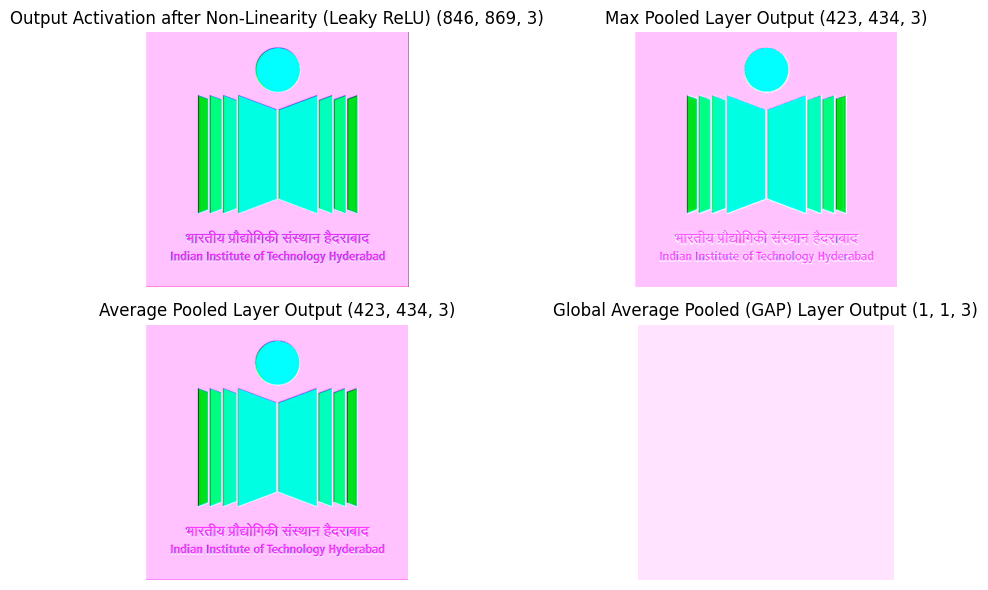

In [6]:
def pooling_layer(activation_map, pool_size=2, stride=2,pooling_type="max"):

    # Get input dimensions
    input_height, input_width,_ = activation_map.shape
    num_channels = activation_map.shape[2] if len(activation_map.shape) == 3 else 1

    # Initialize the output pooled activation map
    pooled_activation = [];

    for i in range(0,num_channels):

      if(pooling_type=="GAP"):
        pooled_activation.append(np.mean(activation_map[:,:,i]))
      else:
        pooled_activation.append(pooling(activation_map[:,:,i],pool_size,stride,pooling_type))

    return np.dstack(pooled_activation)

max_pooled_layer_output = pooling_layer(output_activation_volume, pool_size, pool_stride,"max")

average_pooled_layer_output = pooling_layer(output_activation_volume, pool_size, pool_stride,"average")

global_average_pooled_layer_output = pooling_layer(output_activation_volume, pool_size, pool_stride,"GAP")

plt.figure(figsize=(12, 6))

# Display the input activation map
plt.subplot(2, 2, 1)
plt.imshow(output_activation_volume, cmap='gray')
plt.title(f"Output Activation after Non-Linearity (Leaky ReLU) {output_activation_volume.shape}")
plt.axis("off")

# Display the max pooled output
plt.subplot(2, 2, 2)
plt.imshow(max_pooled_layer_output, cmap='gray')
plt.title(f"Max Pooled Layer Output {max_pooled_layer_output.shape}")
plt.axis("off")

# Display the average pooled output
plt.subplot(2, 2, 3)
plt.imshow(average_pooled_layer_output, cmap='gray')
plt.title(f"Average Pooled Layer Output {average_pooled_layer_output.shape}")
plt.axis("off")

# Display the average pooled output
plt.subplot(2, 2, 4)
plt.imshow(global_average_pooled_layer_output, cmap='gray')
plt.title(f"Global Average Pooled (GAP) Layer Output {global_average_pooled_layer_output.shape}")
plt.axis("off")

plt.tight_layout()
plt.show()

### **(5) MLP**
- The _*mlp*_ function implements a Multilayer Perceptron (MLP) with customizable parameters, including the number of hidden layers, size of each hidden layer, non-linear activation function, and output layer size. The code initializes weights and biases, performs a forward pass through the network, and generates an output vector. The optional softmax function is applied to the output layer, enhancing the model's performance in classification tasks. Example usage demonstrates generating output vectors with and without applying the softmax function. This implementation serves as a flexible and customizable MLP model.

In [7]:
def softmax(x):
    exp_x = np.exp(x - np.max(x))  # Subtracting np.max(x) for numerical stability
    return exp_x / np.sum(exp_x, axis=0)

def mlp(input_vector, hidden_layers, hidden_layer_size, activation_function, output_size, apply_softmax=True):
    # Initialize weights and biases
    weights = [np.random.randn(hidden_layer_size, len(input_vector))]
    biases = [np.zeros((hidden_layer_size, 1))]

    for _ in range(hidden_layers - 1):
        weights.append(np.random.randn(hidden_layer_size, hidden_layer_size))
        biases.append(np.zeros((hidden_layer_size, 1)))

    output_weights = np.random.randn(output_size, hidden_layer_size)
    output_biases = np.zeros((output_size, 1))

    # Forward pass
    x = input_vector.reshape(-1, 1)

    for i in range(hidden_layers):
        x = activation_function(np.dot(weights[i], x) + biases[i])

    output = np.dot(output_weights, x) + output_biases

    # Apply softmax to the output layer if specified
    if apply_softmax:
        output = softmax(output)

    return output.flatten()

# Example usage:
input_vector = np.random.randn(10,10)  # Input vector of size 10
hidden_layers = 2
hidden_layer_size = 5
activation_function = sigmoid
output_size = 5

input_vector= input_vector.reshape(-1,1)
output_with_softmax = mlp(input_vector, hidden_layers, hidden_layer_size, activation_function, output_size)
output_without_softmax = mlp(input_vector, hidden_layers, hidden_layer_size, activation_function, output_size, apply_softmax=False)

print("Output with Softmax:", output_with_softmax)
print("Output without Softmax:", output_without_softmax)


Output with Softmax: [0.23549586 0.22176322 0.20439177 0.17138133 0.16696781]
Output without Softmax: [-1.79030553  0.21792847 -0.56852805  1.91120014  2.36712251]


### **(6) Putting-it all together**
- The provided code processes an input image of size 224x224x3 through a convolutional neural network, showcasing the sequential application of convolution, pooling, and fully connected layers. Each layer's dimensions are appropriately calculated and displayed, emphasizing the transformation of the input image into a vector of dimensions suitable for further analysis or classification. The CNN architecture is built using modular functions for convolution, pooling, and MLP layers. Lets break down the process with dimesions:
1. Input Processing:
  - An image of size 224x224x3 is loaded and normalized.

2. First Convolution Layer:
  - 16 kernels of size 5x5 with ReLU activation.

3. First Max Pooling Layer:
  - Max pooling with a 2x2 kernel and a stride of 2.

4. Second Convolution Layer:
  - 32 kernels of size 3x3 with sigmoid activation.

5. Second Max Pooling Layer:
  - Max pooling with a 2x2 kernel and a stride of 2.

6. Global Average Pooling (GAP) Layer:
  - Global Average Pooling is applied.

7. MLP (Fully Connected Layer):
  - One hidden layer with ReLU activation, mapping to 1000 nodes.

8. Visualization:
  - Display of the original input image.
  - Visualization of the final MLP output using a bar chart.


Image Diemsion:(224, 224, 3)
First Convolution Dimesions:(224, 224, 16)
First Max Pooling Dimesions:(112, 112, 16)
Second Convolution Dimesions:(112, 112, 32)
Second Max Pooling Dimesions:(56, 56, 32)
GAP Dimesions:(1, 1, 32)
FC Layer Input Dimesions:(1, 1, 32)


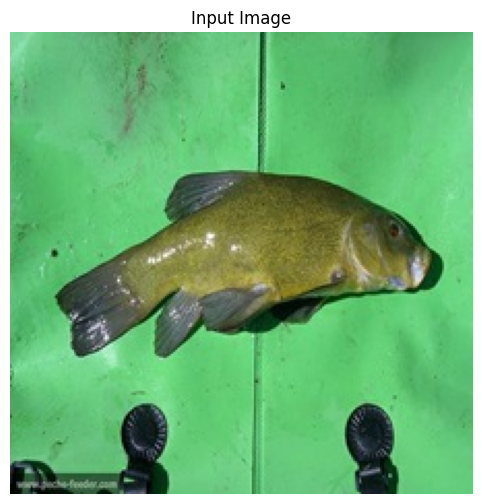

Output Dimesion: (1000,)




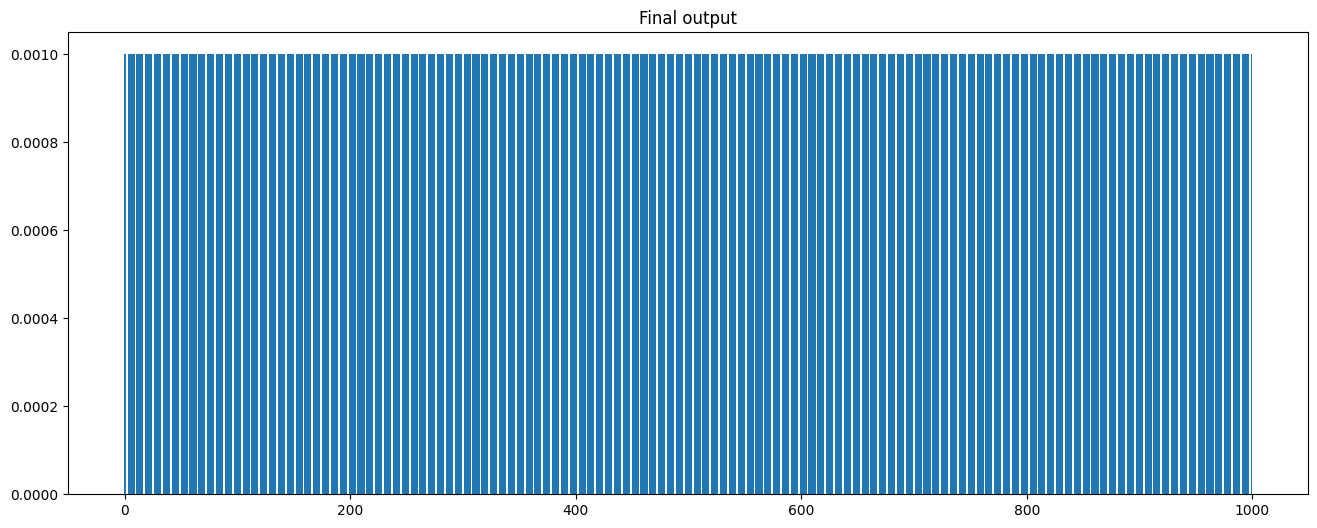



[0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 

In [8]:
# load image
image_path_ = 'ISLVRC.jpg'
image_ = cv2.imread(image_path_)
image_ = cv2.cvtColor(image_, cv2.COLOR_BGR2RGB)

# Normalize the input image
normalized_image_ = normalize_image(image_)
print(f"Image Diemsion:{normalized_image_.shape}")

# Define first convolution parameters
conv1_num_filters = 16
conv1_kernel_size = 5
conv1_stride = 1
conv1_padding = 2

# Apply first convolution layer
_, conv1_output = convolution_layer(normalized_image_, conv1_num_filters, conv1_kernel_size, conv1_stride, conv1_padding, relu)
print(f"First Convolution Dimesions:{conv1_output.shape}")

# Apply first pooling layer
maxpool1_size = 2
maxpool1_stride = 2
maxpooled1_output = pooling_layer(conv1_output, maxpool1_size, maxpool1_stride, pooling_type="max")
print(f"First Max Pooling Dimesions:{maxpooled1_output.shape}")

# Define second convolution parameters
conv2_num_filters = 32
conv2_kernel_size = 3
conv2_stride = 1
conv2_padding = 1

# Apply second convolution layer
_, conv2_output = convolution_layer(maxpooled1_output, conv2_num_filters, conv2_kernel_size, conv2_stride, conv2_padding, sigmoid)
print(f"Second Convolution Dimesions:{conv2_output.shape}")

# Apply second pooling layer
maxpool2_size = 2
maxpool2_stride = 2
maxpooled2_output = pooling_layer(conv2_output, maxpool2_size, maxpool2_stride, pooling_type="max")
print(f"Second Max Pooling Dimesions:{maxpooled2_output.shape}")

# GAP layer
GAPOutput=pooling_layer(maxpooled2_output, pooling_type="GAP")
print(f"GAP Dimesions:{GAPOutput.shape}")

# Define MLP parameters
hidden_layers = 1
hidden_layer_size = int(np.prod(GAPOutput))
output_size = 1000

# Flatten the pooled output for fully connected layer
flattened_output = GAPOutput.reshape(-1,1);

# Forward pass through MLP
final_output = mlp(flattened_output, hidden_layers, hidden_layer_size, relu, output_size)
print(f"FC Layer Input Dimesions:{GAPOutput.shape}")

# Display the original image
plt.figure(figsize=(16, 6))
plt.imshow(normalized_image_)
plt.title("Input Image")
plt.axis('off')
plt.show()

# Display the softmax layer output and its dimension
print(f"Output Dimesion: {final_output.shape}")
print("\n")
# Display the final MLP output
plt.figure(figsize=(16, 6))
plt.bar(range(output_size), final_output)
plt.title("Final output")
plt.show()
print("\n")
print(final_output)

**Sketchmatic Diagram** 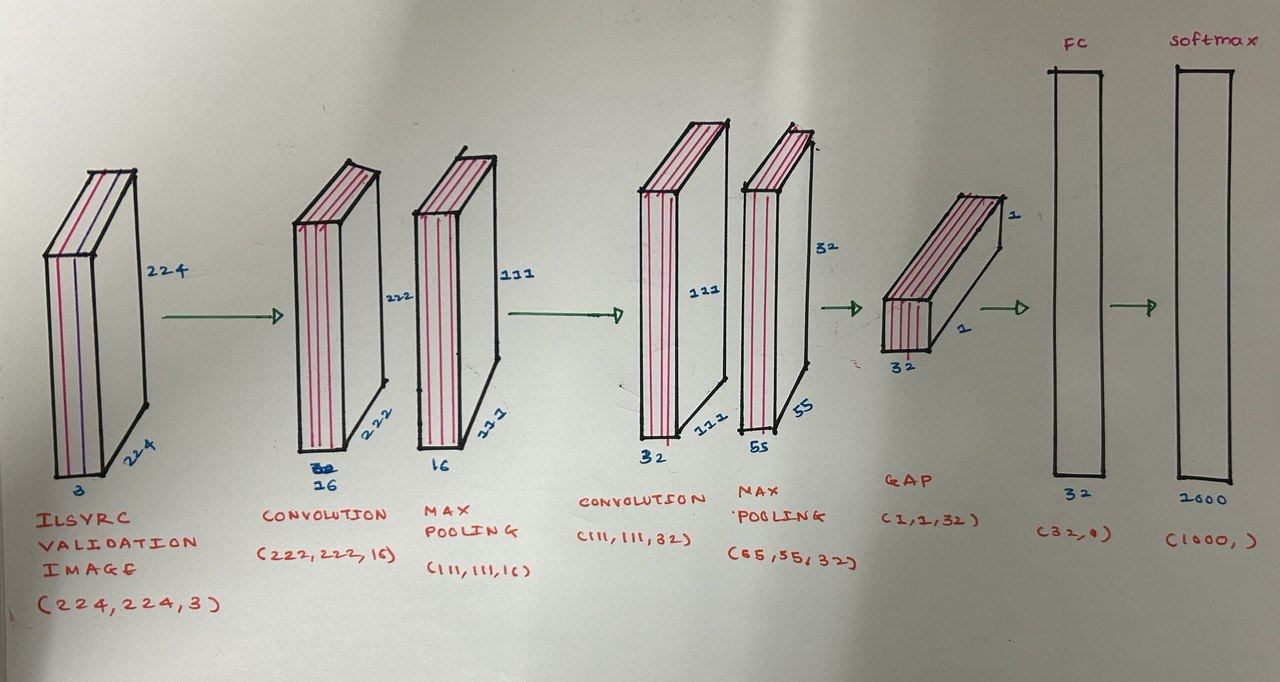

### **(7)  The adding problem**

In [8]:
from sklearn.model_selection import train_test_split
from torch import nn
from tqdm import tqdm

### Data Creation
The provided code defines functions to generate a synthetic dataset for a sequence prediction task. Each sequence in the dataset is a 2D array with variable length, where two randomly chosen elements in the second column are set to 1, and the goal is to predict the sum of the corresponding elements in the first column. The dataset is split into training and testing sets using the *_train_test_split_* function.

In [9]:
np.random.seed(42)
torch.manual_seed(42)

# this function generates single data point/ feature vector of variable length
def generate_sequence(max_length=100):

    # selects length for a sequence randomly between [2,max_length]
    length = np.random.randint(2, max_length + 1)
    # generates 2-d sequence using uniform distribution
    sequence = np.random.rand(length, 2)
    # make second dimension as 0
    sequence[:, 1] = np.zeros(length)
    # randomly make a choice of two index to be set as 1
    indices = np.random.choice(length, size=2, replace=False)
    # make that indices as 1
    sequence[indices, 1] = 1
    # predict the dersired output
    sum_marked = sequence[sequence[:, 1] == 1][:, 0].sum()

    return sequence, sum_marked

def generate_dataset(num_samples=5000, max_length=100):

    # Lists to store input sequences (X) and corresponding output values (y)
    X, y = [], []

    # Loop to generate the specified number of samples
    for _ in range(int(num_samples)):
        # Call a function to generate a sequence and its marked sum
        sequence, sum_marked = generate_sequence(max_length)

        # Convert the sequence to a PyTorch tensor with double precision and append to X
        X.append(torch.from_numpy(sequence).double())

        # Convert the marked sum to a PyTorch tensor and append to y
        y.append(torch.from_numpy(np.array(sum_marked)))
        # Alternative: use the line below instead if torch.tensor() is preferred
        # y.append(torch.tensor(sum_marked))

    # Convert lists to NumPy arrays and specify dtype as "object" to handle variable-sized tensors
    return np.array(X, dtype="object"), np.array(y, dtype="object")

# Generate the dataset
X, y = generate_dataset(num_samples=5000, max_length=30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)

### ELmon (Basic RNN)

- The below Elmon class implements the following two function: <hr/>
- **Hidden State**\
$h_t=\tanh \left(W_{h h} \cdot h_{t-1}+W_{x h} \cdot x_t+b_h\right)$\

- **Prediction**\
$y_t=W_{h y} \cdot h_t+W_{x y} \cdot x_t+b_y$\
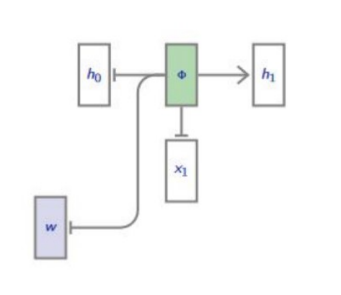

In [10]:
# parameter configuration
torch.manual_seed(42)
inputDimension = 2
hiddenDimension = 10
outputDimension = 1
epochs = 25
learning_rate = 0.005

In [11]:
class Elmon(nn.Module):

  def __init__ (self,inputDimension, hiddenDimension, outputDimension):
    super().__init__();
    self.W_xh = nn.Linear(inputDimension,hiddenDimension, bias=False)
    self.W_hh = nn.Linear(hiddenDimension,hiddenDimension)
    self.W_hy = nn.Linear(hiddenDimension,outputDimension)
    self.double()

  def forward(self, X_t,H_previous):
    U_x = self.W_xh(X_t)
    W_t = self.W_hh(H_previous)
    H_t = torch.tanh(U_x + W_t)
    Y_t = self.W_hy(H_t)

    return H_t,Y_t

In [12]:
ElmonModel = Elmon(inputDimension, hiddenDimension, outputDimension)
print(ElmonModel)

Elmon(
  (W_xh): Linear(in_features=2, out_features=10, bias=False)
  (W_hh): Linear(in_features=10, out_features=10, bias=True)
  (W_hy): Linear(in_features=10, out_features=1, bias=True)
)


In [13]:
# Initialize dictionary to store loss history
Elmon_loss_history = {}

# Define Mean Squared Error loss and Adam optimizer
model_loss = nn.MSELoss()
optimizer = torch.optim.Adam(ElmonModel.parameters(), lr=learning_rate)

# Iterate over epochs
for epoch in tqdm(range(epochs)):

    # List to store losses for each sample in the current epoch
    this_epoch_loss = []

    # Iterate over training data
    for X, y in zip(X_train, y_train):

        # Reset gradients, initialize loss, and hidden state
        ElmonModel.zero_grad()
        loss, H_previous = 0, torch.zeros(1, hiddenDimension, requires_grad=False, dtype=torch.float64)

        # Forward pass through the sequence
        for i in range(X.shape[0]):
            H_t, Y_t = ElmonModel(X[i, :], H_previous)
            H_previous = H_t

        # Calculate and backpropagate loss
        loss = model_loss(Y_t, y)
        loss.backward()

        # Clip gradients to avoid exploding gradients
        nn.utils.clip_grad_norm_(ElmonModel.parameters(), 3)

        # Update model parameters
        optimizer.step()

        # Append current loss to the list
        this_epoch_loss.append(loss.detach().item())

    # Compute mean loss for the current epoch and store in the history dictionary
    Elmon_loss_history[epoch] = torch.tensor(this_epoch_loss).mean()


100%|██████████| 25/25 [07:31<00:00, 18.04s/it]


Loss vs Iteration


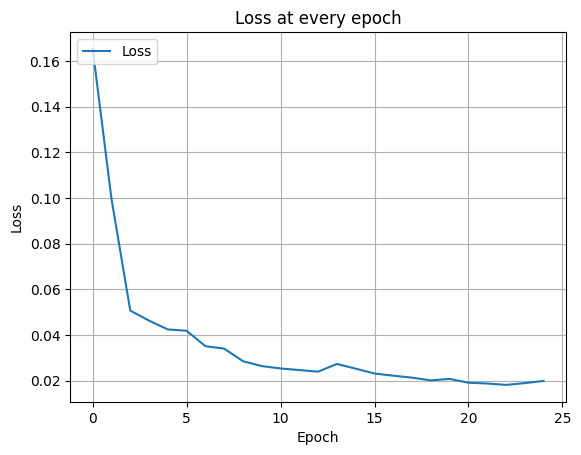

In [14]:
# Plotting Loss over Training.

def PlotLossGraph(X):
  print("Loss vs Iteration")
  plt.plot(X.keys(),X.values(), label='Loss')
  plt.title('Loss at every epoch')
  plt.xlabel('Epoch', color='#000000')
  plt.ylabel('Loss', color='#000000')
  plt.legend(loc='upper left')
  plt.grid()
  plt.show()

PlotLossGraph(Elmon_loss_history)

In [15]:
TotalTestPoint = 0
CorrectPred = 0
for X, y in zip(X_test,y_test):

  H_t,Y_t  =  torch.zeros(1, hiddenDimension, requires_grad=False,dtype=torch.float64), 0
  for i in range(X.shape[0]):
    H_t, Y_t = ElmonModel(X[i,:], H_t)
  if abs(Y_t.item()-y.item()) <0.02:
    CorrectPred+=1
  TotalTestPoint+=1

Elmon_Accuracy = CorrectPred/TotalTestPoint
print("Accuracy : %2.4f"%Elmon_Accuracy )

Accuracy : 0.1010


### LSTM
The Below LSTM class basically uses the following mathematical equations: <hr/>

- **Gates**\
$f_t=\sigma\left(W_f \cdot h_{t-1}+U_f \cdot x_t+b_f\right)$ \
$i_t=\sigma\left(W_i \cdot h_{t-1}+U_i \cdot x_t+b_i\right)$ \
$o_t=\sigma\left(W_o \cdot h_{t-1}+U_o \cdot x_t+b_o\right)$ \

- **States**\
$\tilde{C}_t=\tanh \left(W \cdot h_{t-1}+U \cdot x_t+b_c\right)$ \
 $ C_ {t} $ = $ f_ {t} $ $ \odot $ $ C_ {t-1} $ + $ i_ {t} $ $ \odot $ $ \widehat {C}_ {t} $ \
  $ h_ {t} $ = $ o_ {t} $ $ \odot $ $ \tanh $ ( $ C_ {t} $ ) \

- **Prediction** \
 $ y_ {t} $ = $V  \cdot $ $ h_ {t} $ + $ b_ {y} $

<br/>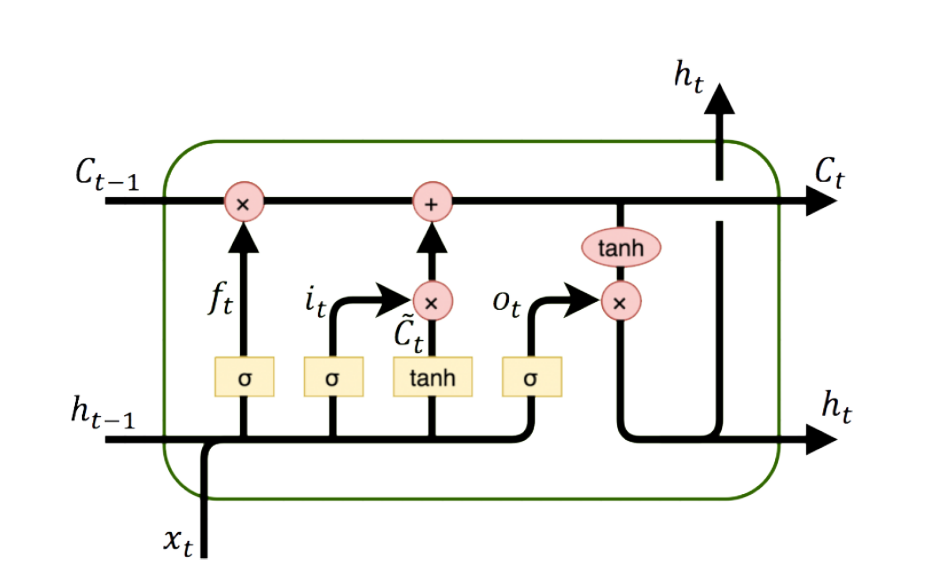

In [16]:
class LSTM(nn.Module):

  def __init__ (self,inputDimension, hiddenDimension, outputDimension):
    super().__init__();

    self.Ui = nn.Linear(inputDimension,hiddenDimension, bias=False)
    self.Uf = nn.Linear(inputDimension,hiddenDimension, bias=False)
    self.Uo = nn.Linear(inputDimension,hiddenDimension, bias=False)
    self.U = nn.Linear(inputDimension,hiddenDimension, bias=False)

    self.Wi = nn.Linear(hiddenDimension,hiddenDimension)
    self.Wf = nn.Linear(hiddenDimension,hiddenDimension)
    self.Wo = nn.Linear(hiddenDimension,hiddenDimension)
    self.W = nn.Linear(hiddenDimension,hiddenDimension)

    self.V = nn.Linear(hiddenDimension,outputDimension)

    self.double()

  def forward(self, X_t, H_previous, C_previous):

    Ui_Xt = self.Ui(X_t)
    Wi_Hp = self.Wi(H_previous)
    inputGate = torch.sigmoid(Ui_Xt + Wi_Hp)

    Uf_Xt = self.Uf(X_t)
    Wf_Hp = self.Wf(H_previous)
    forgetGate = torch.sigmoid(Uf_Xt + Wf_Hp)

    Uo_Xt = self.Uo(X_t)
    Wo_Hp = self.Wo(H_previous)
    outputGate = torch.sigmoid(Uo_Xt + Wo_Hp)

    U_Xt = self.U(X_t)
    W_Hp = self.W(H_previous)
    C_candidate = torch.tanh(U_Xt + W_Hp)

    Ct = inputGate*C_candidate + forgetGate*C_previous

    Ht = outputGate*torch.tanh(Ct)

    Yt = self.V(Ht)

    return Ht,Ct,Yt

In [17]:
LSTMModel = LSTM(inputDimension, hiddenDimension, outputDimension)
print(LSTMModel)

LSTM(
  (Ui): Linear(in_features=2, out_features=10, bias=False)
  (Uf): Linear(in_features=2, out_features=10, bias=False)
  (Uo): Linear(in_features=2, out_features=10, bias=False)
  (U): Linear(in_features=2, out_features=10, bias=False)
  (Wi): Linear(in_features=10, out_features=10, bias=True)
  (Wf): Linear(in_features=10, out_features=10, bias=True)
  (Wo): Linear(in_features=10, out_features=10, bias=True)
  (W): Linear(in_features=10, out_features=10, bias=True)
  (V): Linear(in_features=10, out_features=1, bias=True)
)


In [18]:
# Initialize dictionary to store loss history
LSTM_loss_history = {}

# Define Mean Squared Error loss and Adam optimizer
model_loss = nn.MSELoss()
optimizer = torch.optim.Adam(LSTMModel.parameters(), lr=learning_rate)

# Iterate over epochs
for epoch in tqdm(range(epochs)):

    # List to store losses for each sample in the current epoch
    this_epoch_loss = []

    # Iterate over training data
    for X, y in zip(X_train, y_train):

        # Reset gradients, initialize loss, hidden state, and cell state
        LSTMModel.zero_grad()
        loss, H_previous, C_previous = 0, torch.zeros(1, hiddenDimension, requires_grad=False, dtype=torch.float64), torch.zeros(1, hiddenDimension, requires_grad=False, dtype=torch.float64)

        # Forward pass through the sequence
        for i in range(X.shape[0]):
            H_t, C_t, Y_t = LSTMModel(X[i, :], H_previous, C_previous)
            H_previous, C_previous = H_t, C_t

        # Calculate and backpropagate loss
        loss = model_loss(Y_t, y)
        loss.backward()

        # Clip gradients to avoid exploding gradients
        nn.utils.clip_grad_norm_(LSTMModel.parameters(), 3)

        # Update model parameters
        optimizer.step()

        # Append current loss to the list
        this_epoch_loss.append(loss.detach().item())

    # Compute mean loss for the current epoch and store in the history dictionary
    LSTM_loss_history[epoch] = torch.tensor(this_epoch_loss).mean()


100%|██████████| 25/25 [19:44<00:00, 47.37s/it]


Loss vs Iteration


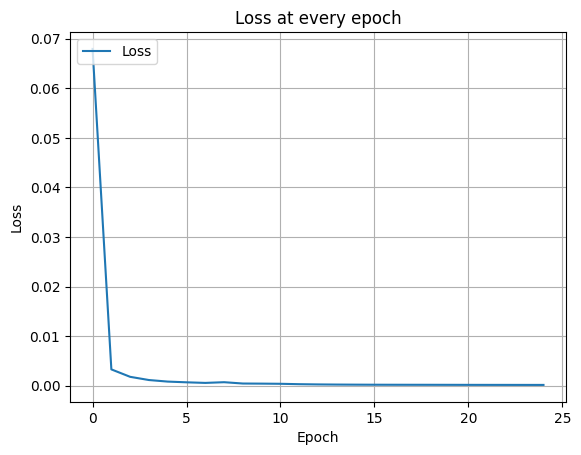

In [19]:
PlotLossGraph(LSTM_loss_history)

In [20]:
TotalTestPoint = 0
CorrectPred = 0
for X, y in zip(X_test,y_test):

  H_previous = torch.zeros(1,hiddenDimension, requires_grad=False,dtype=torch.float64)
  C_previous = torch.zeros(1,hiddenDimension, requires_grad=False,dtype=torch.float64)

  for i in range(X.shape[0]):
      Ht, Ct, Yt = LSTMModel(X[i,:],H_previous,C_previous)
      H_previous = Ht
      C_previous = Ct
  if abs(Yt.item()-y.item()) <0.02:
    CorrectPred+=1
  TotalTestPoint+=1

LSTM_Accuracy = CorrectPred/TotalTestPoint
print("Accuracy : %2.4f"%LSTM_Accuracy )

Accuracy : 0.9975


### GRU
The Below GRU class basically uses the following mathematical equations: <hr/>
- **Gates**\
 $r_t=\sigma\left(W_r \cdot h_{t-1}+U_r \cdot x_t+b_r\right)$ \
$ O_ {t} $ = $ \sigma $ ( $ W_ {o} $ $ \cdot $ $ h_ {t-1} $ + $ U_ {o} $ $ \cdot $ $ x_ {t} $ + $ b_ {o}) $ <br/>


- **States** \
$\tilde{h}_t=\tanh \left(W \cdot o_t \odot h_{t-1}+U \cdot x_t+b\right)$ \
$h_t=\left(1-r_t\right) \odot h_{t-1}+r_t \odot \tilde{h}_t$ <br/>



- **Predictions** \
$y_t=V \cdot h_t+b_y$
<br/>

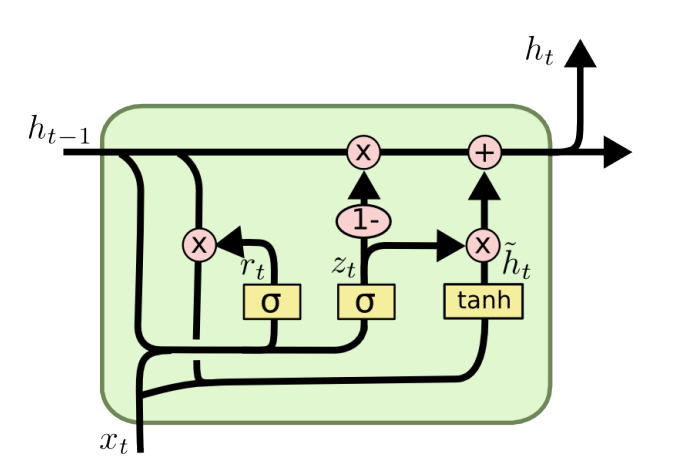

In [21]:
class GRU(nn.Module):

  def __init__ (self,inputDimension, hiddenDimension, outputDimension):
    super().__init__();

    # Define linear layers for reset gate, update gate, and candidate hidden state
    self.Ur = nn.Linear(inputDimension,hiddenDimension, bias=False)
    self.Uo = nn.Linear(inputDimension,hiddenDimension, bias=False)
    self.U = nn.Linear(inputDimension,hiddenDimension, bias=False)

    self.Wr = nn.Linear(hiddenDimension,hiddenDimension)
    self.Wo = nn.Linear(hiddenDimension,hiddenDimension)
    self.W = nn.Linear(hiddenDimension,hiddenDimension)

    # Linear layer for output
    self.V = nn.Linear(hiddenDimension,outputDimension)

    self.double()

  def forward(self, X_t, H_previous):

    # Calculate reset gate
    Ur_Xt = self.Ur(X_t)
    Wr_Hp = self.Wr(H_previous)
    resetGate = torch.sigmoid(Ur_Xt + Wr_Hp)

    # Calculate update gate
    Uo_Xt = self.Uo(X_t)
    Wo_Hp = self.Wo(H_previous)
    outputGate = torch.sigmoid(Uo_Xt + Wo_Hp)

    # Calculate candidate hidden state
    U_Xt = self.U(X_t)
    W_Hp = self.W(outputGate * H_previous)
    H_candidate = torch.tanh(U_Xt + W_Hp)

    # Update hidden state using reset and update gates
    Ht = resetGate * H_candidate + (1 - resetGate) * H_previous

    # Calculate output
    Yt = self.V(Ht)

    return Ht,Yt

In [22]:
GRUModel = GRU(inputDimension, hiddenDimension, outputDimension)
print(GRUModel)

GRU(
  (Ur): Linear(in_features=2, out_features=10, bias=False)
  (Uo): Linear(in_features=2, out_features=10, bias=False)
  (U): Linear(in_features=2, out_features=10, bias=False)
  (Wr): Linear(in_features=10, out_features=10, bias=True)
  (Wo): Linear(in_features=10, out_features=10, bias=True)
  (W): Linear(in_features=10, out_features=10, bias=True)
  (V): Linear(in_features=10, out_features=1, bias=True)
)


In [23]:
# Initialize dictionary to store GRU model loss history
GRU_loss_history = {}

# Define Mean Squared Error loss and Adam optimizer
model_loss = nn.MSELoss()
optimizer = torch.optim.Adam(GRUModel.parameters(), lr=learning_rate)

# Iterate over epochs
for epoch in tqdm(range(epochs)):

    # List to store losses for each sample in the current epoch
    this_epoch_loss = []

    # Iterate over training data
    for X, y in zip(X_train, y_train):

        # Reset gradients, initialize loss, and hidden state
        GRUModel.zero_grad()
        loss, H_previous = 0, torch.zeros(1, hiddenDimension, requires_grad=False, dtype=torch.float64)

        # Forward pass through the sequence
        for i in range(X.shape[0]):
            H_t, Y_t = GRUModel(X[i, :], H_previous)
            H_previous = H_t

        # Calculate and backpropagate loss
        loss = model_loss(Y_t, y)
        loss.backward()

        # Clip gradients to avoid exploding gradients
        nn.utils.clip_grad_norm_(GRUModel.parameters(), 3)

        # Update model parameters
        optimizer.step()

        # Append current loss to the list
        this_epoch_loss.append(loss.detach().item())

    # Compute mean loss for the current epoch and store in the history dictionary
    GRU_loss_history[epoch] = torch.tensor(this_epoch_loss).mean()


100%|██████████| 25/25 [16:51<00:00, 40.47s/it]


Loss vs Iteration


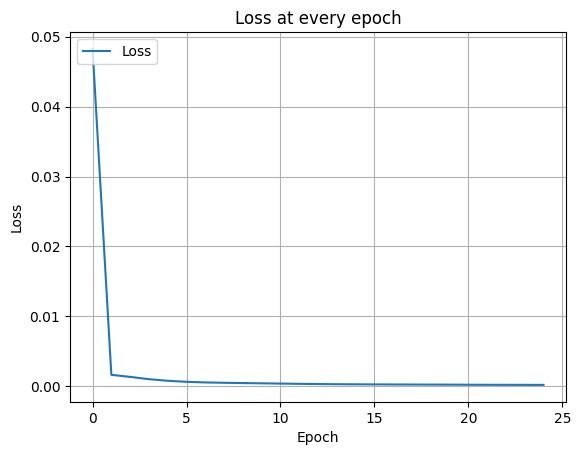

In [24]:
PlotLossGraph(GRU_loss_history)

In [25]:
TotalTestPoint = 0
CorrectPred = 0
for X, y in zip(X_test,y_test):

  H_previous = torch.zeros(1,hiddenDimension, requires_grad=False,dtype=torch.float64)

  for i in range(X.shape[0]):
      Ht, Yt = GRUModel(X[i,:],H_previous)
      H_previous = Ht
  if abs(Yt.item()-y.item()) <0.02:
    CorrectPred+=1
  TotalTestPoint+=1

GRU_Accuracy = CorrectPred/TotalTestPoint
print("Accuracy : %2.4f"%GRU_Accuracy )

Accuracy : 0.9250


### Learning Curves & Performance Comparison
- In this code snippet, three types of recurrent neural networks (RNNs) — Elman network, Long Short-Term Memory (LSTM), and Gated Recurrent Unit (GRU) — are trained and their performances are compared against a baseline model that always predicts a sum of 1. The learning curves, representing the loss at each epoch during training, are plotted to visualize the training progress of each model. The baseline loss is calculated separately.
- The learning curves show how the loss changes over epochs for each RNN model and the baseline. The final performance is summarized in a table, providing the accuracy of each RNN model. This comparison allows for an assessment of the effectiveness of different RNN architectures in predicting the target variable. The baseline serves as a reference point for evaluating the models' performance.

- The Following results in terms of accuracy was observed:
1. For Larger Sequence Length
  - **GRU > LSTM > Elmon**
2. For Larger Sequence Length
  - **LSTM > GRU > Elmon**

In [26]:
# Calculating Baseline
baseline = {}
for epoch in tqdm(range(epochs)):
  epoch_baseline = list()
  for X, y in zip(X_train,y_train):
    lossB = model_loss(torch.tensor(1), y)
    epoch_baseline.append(lossB.detach().item())
  baseline[epoch] = torch.tensor(epoch_baseline).mean()

100%|██████████| 25/25 [00:03<00:00,  7.57it/s]


Loss vs Iteration (Combined)


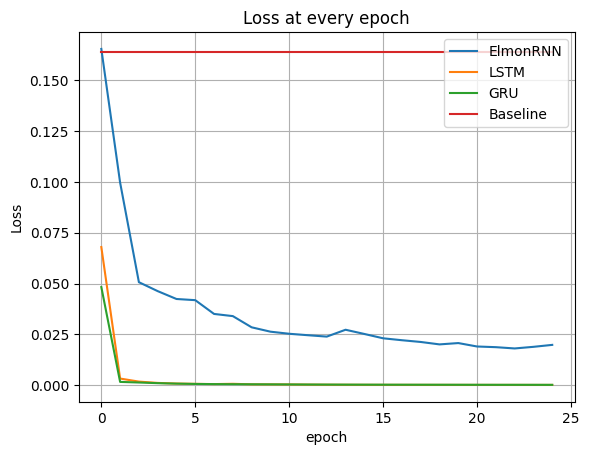

In [27]:
print("Loss vs Iteration (Combined)")
plt.plot(Elmon_loss_history.keys(),Elmon_loss_history.values(),  label='ElmonRNN')
plt.plot(LSTM_loss_history.keys(),LSTM_loss_history.values(), label='LSTM')
plt.plot(GRU_loss_history.keys(),GRU_loss_history.values(), label='GRU')
plt.plot(baseline.keys(),baseline.values(), label='Baseline')
plt.title('Loss at every epoch')
plt.xlabel('epoch', color='#000000')
plt.ylabel('Loss', color='#000000')
plt.legend(loc='upper right')
plt.grid()
plt.show()

In [28]:
# Define column names
model_column = "Model"
accuracy_column = "Accuracy"

# Print the table header
print(f"{model_column:<10} | {accuracy_column:>8}")
print("-" * 25)

# Print each row
print(f"{'Elmon':<10} | {Elmon_Accuracy:>8.2f}")
print(f"{'LSTM':<10} | {LSTM_Accuracy:>8.2f}")
print(f"{'GRU':<10} | {GRU_Accuracy:>8.2f}")

Model      | Accuracy
-------------------------
Elmon      |     0.10
LSTM       |     1.00
GRU        |     0.93
